In [25]:
import pandas as pd
import numpy as np

In [26]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [27]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


# Data Cleaning

In [28]:
df.drop(labels=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df.rename(columns={'v1': 'Category' , 'v2':'Email'}, inplace=True)

print(df.isna().sum())
print(df.duplicated().sum())

Category    0
Email       0
dtype: int64
403


In [29]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Category'] = le.fit_transform(df['Category'])

In [31]:
df.head()

,Category,Email
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# EDA

([<matplotlib.patches.Wedge at 0x2b9688e0bb0>,
 [Text(-1.014499732282844, 0.4251944181172162, 'ham'),
  Text(1.0144998708287172, -0.42519408755122207, 'spam')],
 [Text(-0.5533634903360967, 0.2319242280639361, '87.37'),
  Text(0.553363565906573, -0.231924047755212, '12.63')])

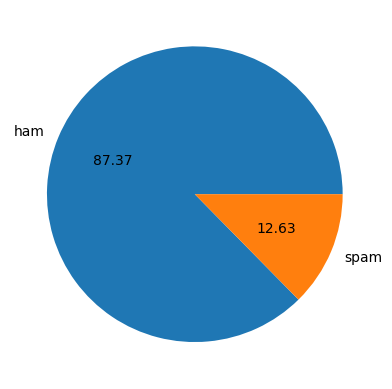

In [32]:
import matplotlib.pyplot as plt
plt.pie(df['Category'].value_counts(), autopct='%.2f', labels=['ham', 'spam'])

In [33]:
import nltk
df['num_characters'] = df['Email'].apply(len)
df['num_words'] = df['Email'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentence'] = df['Email'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [34]:
df.head()

,Category,Email,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [35]:
df.describe()

,Category,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


<Axes: xlabel='num_characters', ylabel='Count'>

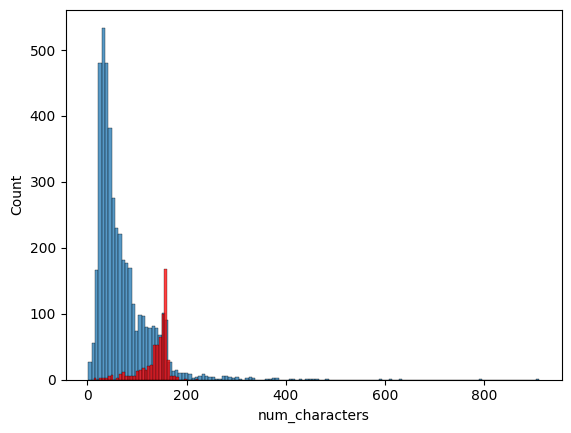

In [36]:
import seaborn as sns
sns.histplot(df[df['Category'] == 0]['num_characters'])
sns.histplot(df[df['Category'] == 1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

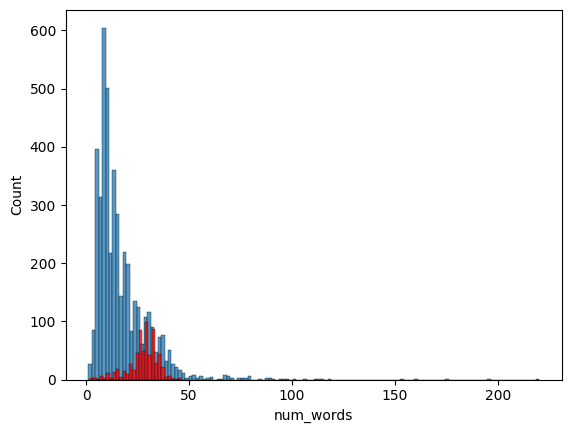

In [37]:
sns.histplot(df[df['Category'] == 0]['num_words'])
sns.histplot(df[df['Category'] == 1]['num_words'], color='red')

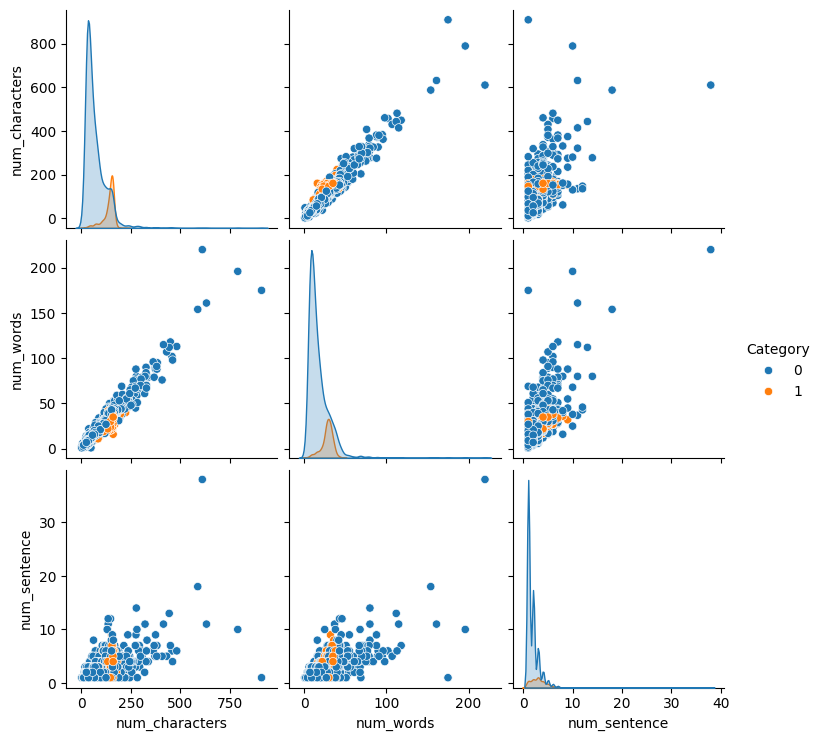

In [39]:
sns.pairplot(df, hue='Category')

# Text Preprocessing

In [60]:
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
ps = PorterStemmer()

def text_preprocessor(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for word in text:
        if word.isalnum():
            y.append(word)

    text = y[:]
    y.clear()
    for word in text:
        if word not in stopwords.words('english') and word not in string.punctuation:
            y.append(ps.stem(word))
    
    return ' '.join(y)

In [61]:
df['Email'] = df['Email'].apply(text_preprocessor)

In [62]:
df

,Category,Email,num_characters,num_words,num_sentence
0,0,go jurong point crazi avail bugi n great world...,111,24,2
1,0,ok lar joke wif u oni,29,8,2
2,1,free entri 2 wkli comp win fa cup final tkt 21...,155,37,2
3,0,u dun say earli hor u c alreadi say,49,13,1
4,0,nah think goe usf live around though,61,15,1
...,...,...,...,...,...
5567,1,2nd time tri 2 contact u pound prize 2 claim e...,161,35,4
5568,0,b go esplanad fr home,37,9,1
5569,0,piti mood suggest,57,15,2
5570,0,guy bitch act like interest buy someth els nex...,125,27,1


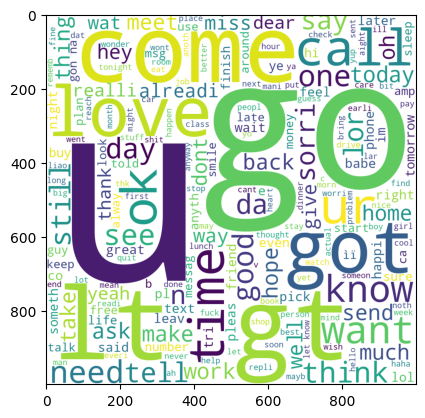

In [78]:
from wordcloud import WordCloud

wc = WordCloud(height=1000, width=1000, min_font_size=10, background_color='white')
spam_wc = wc.generate(df[df['Category'] == 0]['Email'].str.cat(sep=' '))
plt.imshow(spam_wc)

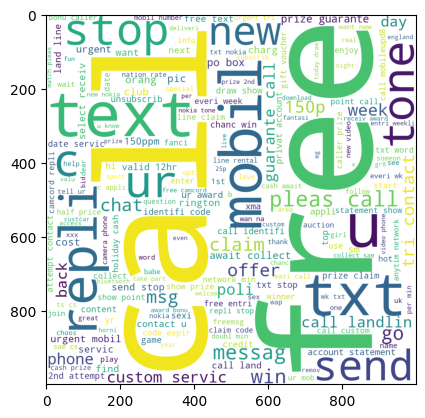

In [79]:
ham_wc = wc.generate(df[df['Category'] == 1]['Email'].str.cat(sep=' '))
plt.imshow(spam_wc)

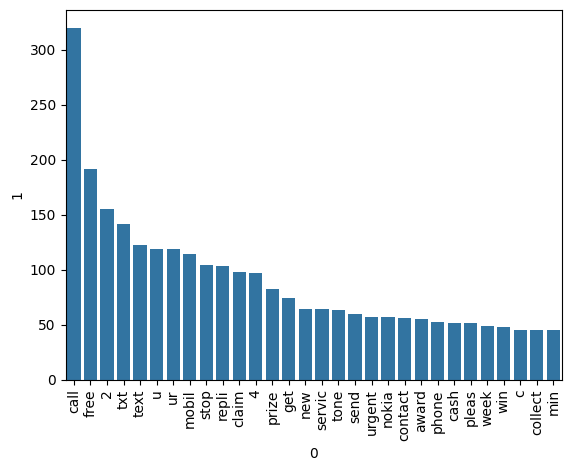

In [94]:
spam_corpus = []
for sent in df[df['Category'] == 1]['Email'].tolist():
    for word in sent.split():
        spam_corpus.append(word)

from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

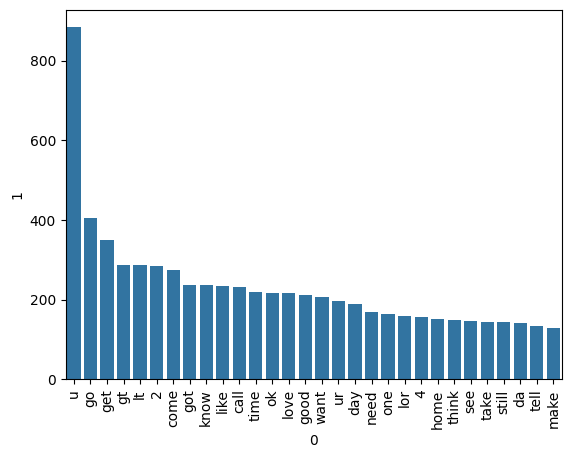

In [96]:
ham_corpus = []
for sent in df[df['Category'] == 0]['Email'].tolist():
    for word in sent.split():
        ham_corpus.append(word)

from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# Text Vectorization

In [193]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

cv = CountVectorizer()
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['Email']).toarray()
y = df['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

In [121]:
models = {
    'LogisticRegression': LogisticRegression(),
    'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB(),
    'SVC': SVC(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'XGBClassifier': XGBClassifier(),
}

In [127]:
from sklearn.metrics import accuracy_score, precision_score

def model_training(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return [accuracy_score(y_test, y_pred) , precision_score(y_test, y_pred)]

In [158]:
scores = [[]]
for name, model in models.items():
    print(name, model)
    accu_score, prec_score = model_training(model, X_train, X_test, y_train, y_test)
    scores.append([name, accu_score, prec_score])

LogisticRegression LogisticRegression()
GaussianNB GaussianNB()
MultinomialNB MultinomialNB()
BernoulliNB BernoulliNB()
SVC SVC()
KNeighborsClassifier KNeighborsClassifier()
DecisionTreeClassifier DecisionTreeClassifier()
RandomForestClassifier RandomForestClassifier()
BaggingClassifier BaggingClassifier()
ExtraTreesClassifier ExtraTreesClassifier()
GradientBoostingClassifier GradientBoostingClassifier()
AdaBoostClassifier AdaBoostClassifier()
XGBClassifier XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max

In [159]:
temp_df = pd.DataFrame(scores[1:], columns=['Name', 'Accuracy', 'Precision'])

In [162]:
temp_df.sort_values('Precision', ascending=False)

,Name,Accuracy,Precision
5,KNeighborsClassifier,0.896518,1.000000
7,RandomForestClassifier,0.969052,0.991304
4,SVC,0.968085,0.991228
2,MultinomialNB,0.961315,0.990654
9,ExtraTreesClassifier,0.973888,0.975806
3,BernoulliNB,0.966151,0.966102
10,GradientBoostingClassifier,0.965184,0.957983
12,XGBClassifier,0.973888,0.953846
0,LogisticRegression,0.948743,0.942308
8,BaggingClassifier,0.958414,0.886364


In [163]:
from sklearn.ensemble import StackingClassifier
estimators = [("RF",RandomForestClassifier()), ('SVC', SVC()), ('MNB', MultinomialNB())]
sc = StackingClassifier(estimators, final_estimator=RandomForestClassifier(), cv=6)
sc.fit(X_train, y_train)

StackingClassifier(cv=6,
                   estimators=[('RF', RandomForestClassifier()), ('SVC', SVC()),
                               ('MNB', MultinomialNB())],
                   final_estimator=RandomForestClassifier())

In [164]:
y_pred = sc.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.9825918762088974
0.9568345323741008


# Hyper Parameter Tuning

In [165]:
params = {
    'n_estimators': [100, 200, 300, 500],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [20, 30, 5, 10, None],
    'min_samples_leaf':[1,2,4, None],
    'max_features': ['auto', 'sqrt', 'log2']
}
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier(random_state=42)
grid = RandomizedSearchCV(rf, param_distributions=params, n_jobs=-1, verbose=1, cv=5)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


d:\Data Science\Projects\Email Spam Classifier\venv\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Data Science\Projects\Email Spam Classifier\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Data Science\Projects\Email Spam Classifier\venv\lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "d:\Data Science\Projects\Email Spam Classifier\venv\lib\site-packages\sklearn\base.py", line 436,

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [20, 30, 5, 10, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, None],
                                        'n_estimators': [100, 200, 300, 500]},
                   verbose=1)

In [168]:
grid.best_params_

{'n_estimators': 200,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 30,
 'criterion': 'log_loss'}

In [198]:
estimated_model = RandomForestClassifier(n_estimators=200, min_samples_leaf=2, max_features='sqrt', max_depth=30, criterion='log_loss', random_state=13)
estimated_model.fit(X_train, y_train)

RandomForestClassifier(criterion='log_loss', max_depth=30, min_samples_leaf=2,
                       n_estimators=200, random_state=13)

In [197]:
X_test.shape

(1034, 6708)

In [189]:
y_pred = estimated_model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.9690522243713733
0.991304347826087


In [199]:
import pickle
pickle.dump(estimated_model, open('Model.pkl', 'wb'))
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))